## Segmentation on MLBFR


### Installing the Detectron2 dependencies

In [1]:
!python -m pip install pyyaml==5.1
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 KB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyyaml: filename=PyYAML-5.1-cp38-cp38-linux_x86_64.whl size=44089 sha256=3f479e38ad8dad47d6000de7500d9af050cd74303ec145ec16f4335c837a2c57
  Stored in directory: /root/.cache/pip/wheels/52/dd/2b/10ff8b0ac81b93946bb5fb9e6749bae2dac246506c8774e6cf
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2022.2.1 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheel

### Load Libraries


In [2]:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import cv2

### Mount Drive & Load Weight

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
!cp /content/drive/MyDrive/RESEARCH/CHECKPOINTS/model_final.pth /content/
!cp /content/drive/MyDrive/RESEARCH/DATASET/IMG0003219.jpg /content/
!cp /content/drive/MyDrive/RESEARCH/CHECKPOINTS/mlbfr.yaml /content

In [20]:
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.data import MetadataCatalog, DatasetCatalog
import os


# Load custom config
cfg = get_cfg()
cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/RESEARCH/CHECKPOINTS/model_0009999.pth"
cfg.merge_from_file("/content/mlbfr.yaml")
# cfg.MODEL.MASK_ON = True
# cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
# cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512 
my_dataset_train_metadata = MetadataCatalog.get("mlbfr_train")

 

predictor = DefaultPredictor(cfg)

[02/12 21:06:50 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from  ...


### Check image

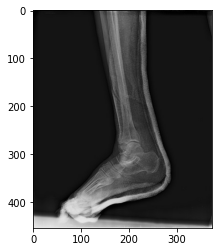

In [6]:
im = cv2.imread("/content/IMG0003589.jpg")
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

### Inference using the Loaded Weight

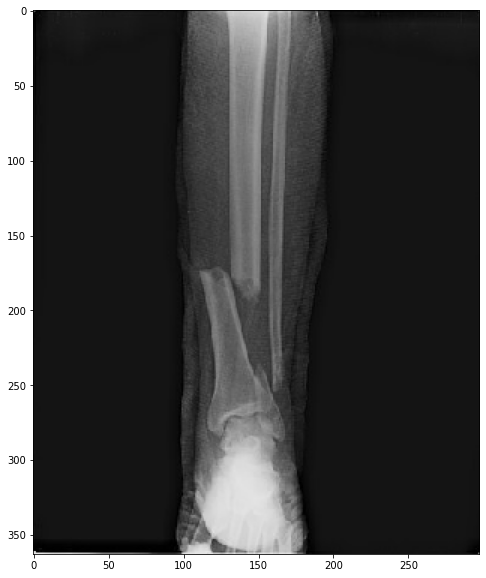

In [33]:
from detectron2.utils.visualizer import Visualizer

im = cv2.imread("/content/IMG0003219.jpg")
outputs = predictor(im)

v = Visualizer(im[:, :, ::-1],metadata=my_dataset_train_metadata,scale=0.8)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize = (14, 10))
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
plt.show()